In [14]:
import matplotlib.pyplot as plt

In [25]:
def read_fasta(file_name):
    genomes = {}
    current_header = None
    current_seq = []
    
    with open(file_name, 'r') as file:
        for line in file:
            line = line.strip()
            if line.startswith(">"):  
                if current_header:
                    genomes[current_header] = ''.join(current_seq)
                current_header = line[1:]  
                current_seq = []
            else:
                current_seq.append(line)
        
        if current_header:  # last genome
            genomes[current_header] = ''.join(current_seq)
    
    return genomes

In [26]:
def calculate_nucleotide_frequencies_window(seq, window_size, step_size):
    freq_A, freq_T, freq_C, freq_G = [], [], [], []
    
    for i in range(0, len(seq) - window_size + 1, step_size):
        window = seq[i:i + window_size]
        
        A_count = window.count('A')
        T_count = window.count('T')
        C_count = window.count('C')
        G_count = window.count('G')
        
        total_bases = len(window)
        
        freq_A.append((A_count / total_bases) * 100)
        freq_T.append((T_count / total_bases) * 100)
        freq_C.append((C_count / total_bases) * 100)
        freq_G.append((G_count / total_bases) * 100)
    
    return freq_A, freq_T, freq_C, freq_G

In [27]:
def normalize_sequences_to_longest(genomes, longest_length):
    normalized_genomes = {}
    
    for genome_name, sequence in genomes.items():
        seq_length = len(sequence)
        if seq_length < longest_length:
            normalized_genomes[genome_name] = sequence + sequence[-(longest_length - seq_length):]
        else:
            normalized_genomes[genome_name] = sequence
    
    return normalized_genomes

In [28]:
def calculate_average_nucleotide_percentages_across_genomes(genomes, window_size, step_size):
    max_windows = max((len(sequence) - window_size) // step_size + 1 for sequence in genomes.values())

    total_A = [0] * max_windows
    total_T = [0] * max_windows
    total_C = [0] * max_windows
    total_G = [0] * max_windows
    
    for genome_name, sequence in genomes.items():
        freq_A, freq_T, freq_C, freq_G = calculate_nucleotide_frequencies_window(sequence, window_size, step_size)
        
        for i in range(len(freq_A)):
            total_A[i] += freq_A[i]
            total_T[i] += freq_T[i]
            total_C[i] += freq_C[i]
            total_G[i] += freq_G[i]
    
    num_genomes = len(genomes)
    
    avg_A = [x / num_genomes for x in total_A]
    avg_T = [x / num_genomes for x in total_T]
    avg_C = [x / num_genomes for x in total_C]
    avg_G = [x / num_genomes for x in total_G]
    
    return avg_A, avg_T, avg_C, avg_G

In [29]:
def plot_average_nucleotide_percentages(genomes, window_size, step_size):
    avg_A, avg_T, avg_C, avg_G = calculate_average_nucleotide_percentages_across_genomes(genomes, window_size, step_size)
    
    avg_A_percent = sum(avg_A) / len(avg_A)
    avg_T_percent = sum(avg_T) / len(avg_T)
    avg_C_percent = sum(avg_C) / len(avg_C)
    avg_G_percent = sum(avg_G) / len(avg_G)
    
    nucleotides = ['A', 'T', 'C', 'G']
    averages = [avg_A_percent, avg_T_percent, avg_C_percent, avg_G_percent]
    
    plt.figure(figsize=(8, 6))
    plt.bar(nucleotides, averages, color=['blue', 'orange', 'green', 'red'])
    plt.xlabel("Nucleotide")
    plt.ylabel("Avg. Perc.")
    plt.title("Avg. Nucleotide Perc. - all genomes")
    plt.show()

In [30]:
def plot_nucleotide_evolution_per_genome(genomes, window_size, step_size):
    for genome_name, sequence in genomes.items():
        freq_A, freq_T, freq_C, freq_G = calculate_nucleotide_frequencies_window(sequence, window_size, step_size)
        
        plt.figure(figsize=(10, 6))
        plt.plot(freq_A, label='A', linestyle='--', color='blue')
        plt.plot(freq_T, label='T', linestyle='-.', color='orange')
        plt.plot(freq_C, label='C', linestyle=':', color='green')
        plt.plot(freq_G, label='G', linestyle='-', color='red')
        
        plt.xlabel("Window Position")
        plt.ylabel("Nucleotide Perc.")
        plt.title(f"Nucleotide evo in {genome_name}")
        plt.legend(title="Nucleotides")
        plt.tight_layout()
        plt.show()

In [31]:
def plot_combined_nucleotide_frequencies(genomes, window_size, step_size, longest_length):
    avg_A, avg_T, avg_C, avg_G = calculate_average_nucleotide_percentages_across_genomes(genomes, window_size, step_size)
    
    plt.figure(figsize=(10, 6))
    
    plt.plot(avg_A, label='A', linestyle='--', color='blue')
    plt.plot(avg_T, label='T', linestyle='-.', color='orange')
    plt.plot(avg_C, label='C', linestyle=':', color='green')
    plt.plot(avg_G, label='G', linestyle='-', color='red')
    
    plt.xlabel("Window Position")
    plt.ylabel("Avg. Nucleotide Perc.")
    plt.title("Avg. Nucleotide evo - all genomes")
    plt.legend(title="Nucleotides")
    plt.tight_layout()
    plt.show()

In [32]:
def plot_all_genomes_together(genomes, window_size, step_size):
    plt.figure(figsize=(12, 8))
    
    for genome_name, sequence in genomes.items():
        freq_A, freq_T, freq_C, freq_G = calculate_nucleotide_frequencies_window(sequence, window_size, step_size)
        
        plt.plot(freq_A, label=f'{genome_name} - A', linestyle='--', alpha=0.6)
        plt.plot(freq_T, label=f'{genome_name} - T', linestyle='-.', alpha=0.6)
        plt.plot(freq_C, label=f'{genome_name} - C', linestyle=':', alpha=0.6)
        plt.plot(freq_G, label=f'{genome_name} - G', linestyle='-', alpha=0.6)
    
    plt.xlabel("Window Position")
    plt.ylabel("Nucleotide Perc.")
    plt.title("Nucleotide evo - all genomes")
    plt.legend(title="Genomes", bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.tight_layout()
    plt.show()

In [33]:
def main(file_name, window_size=3000, step_size=300):
    genomes = read_fasta(file_name)
    
    longest_length = max(len(seq) for seq in genomes.values())
    
    normalized_genomes = normalize_sequences_to_longest(genomes, longest_length)
    
    plot_average_nucleotide_percentages(normalized_genomes, window_size, step_size)
    
    plot_nucleotide_evolution_per_genome(normalized_genomes, window_size, step_size)
    
    plot_combined_nucleotide_frequencies(normalized_genomes, window_size, step_size, longest_length)
    
    plot_all_genomes_together(normalized_genomes, window_size, step_size)

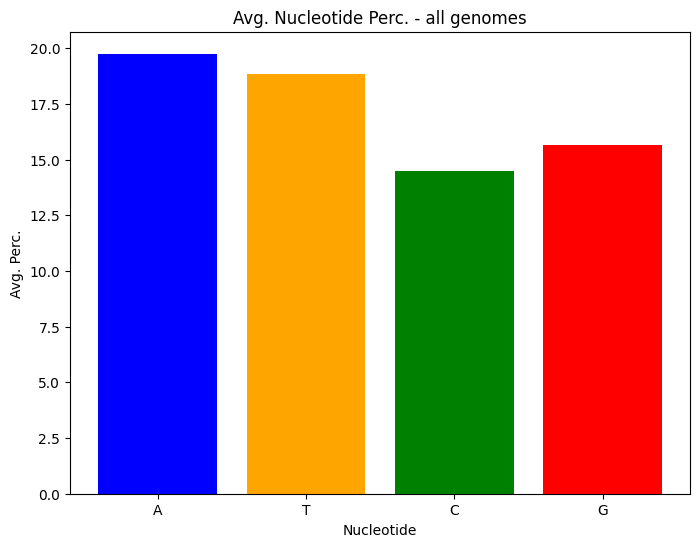

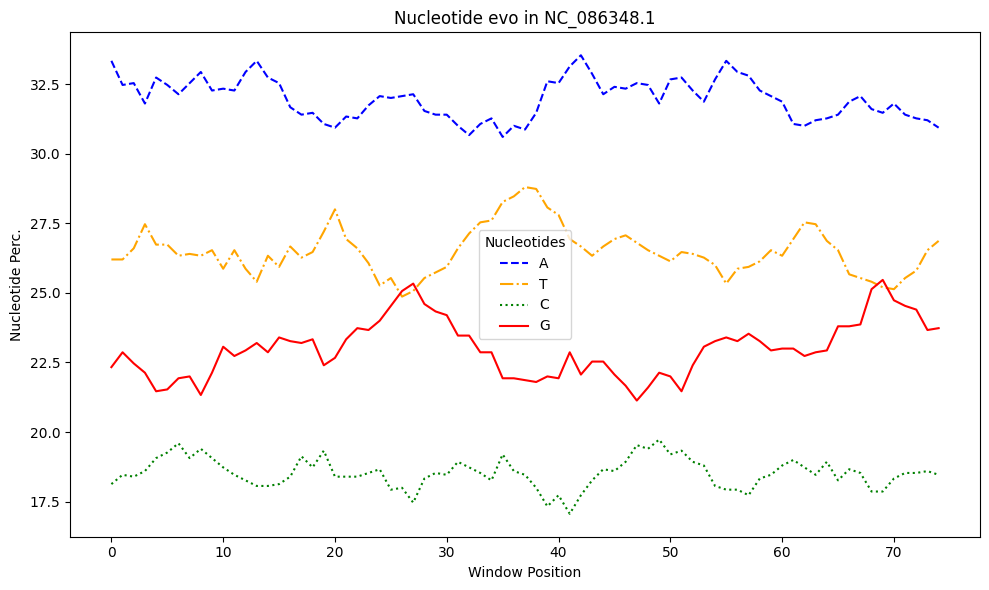

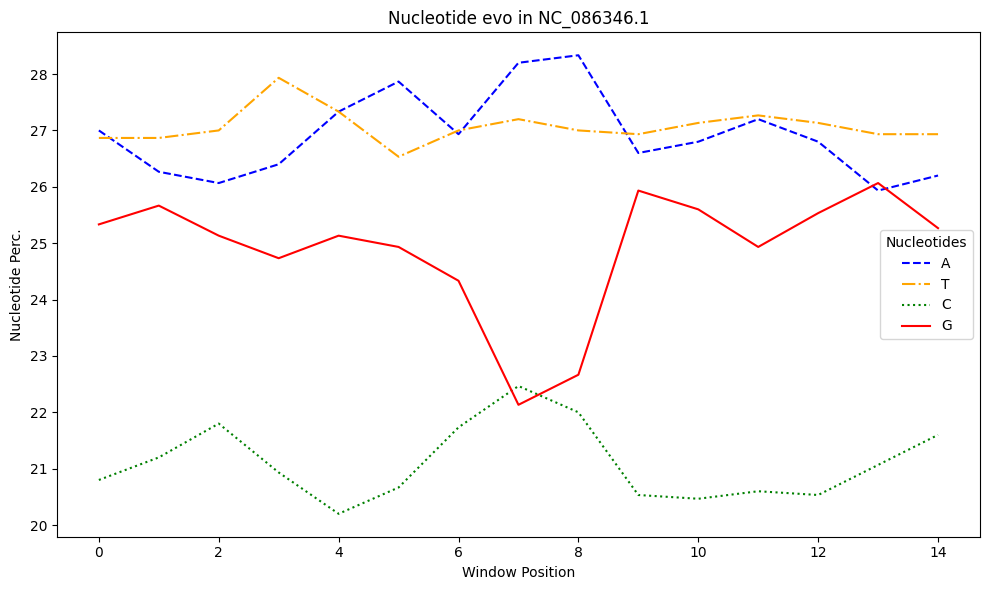

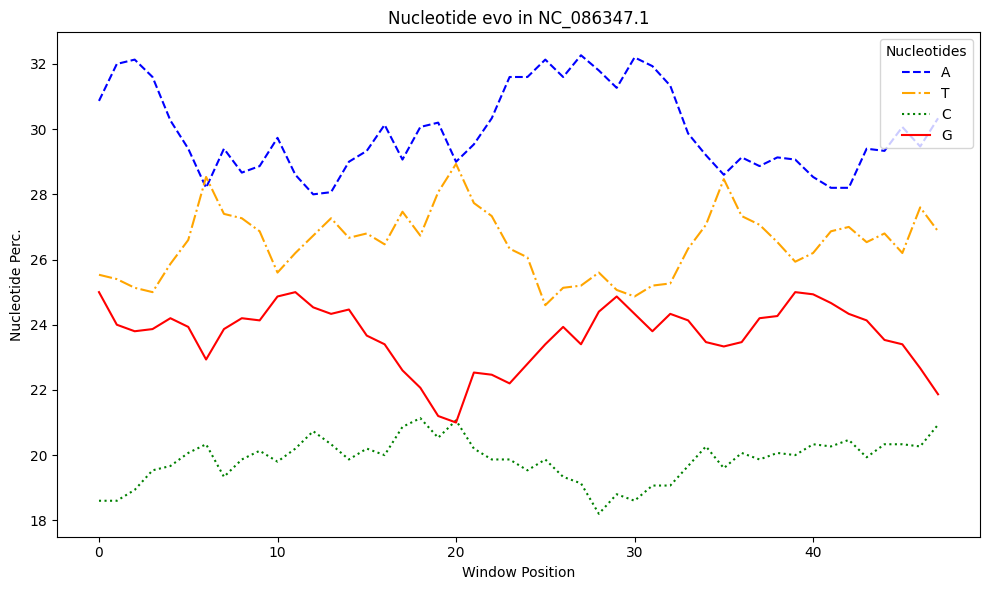

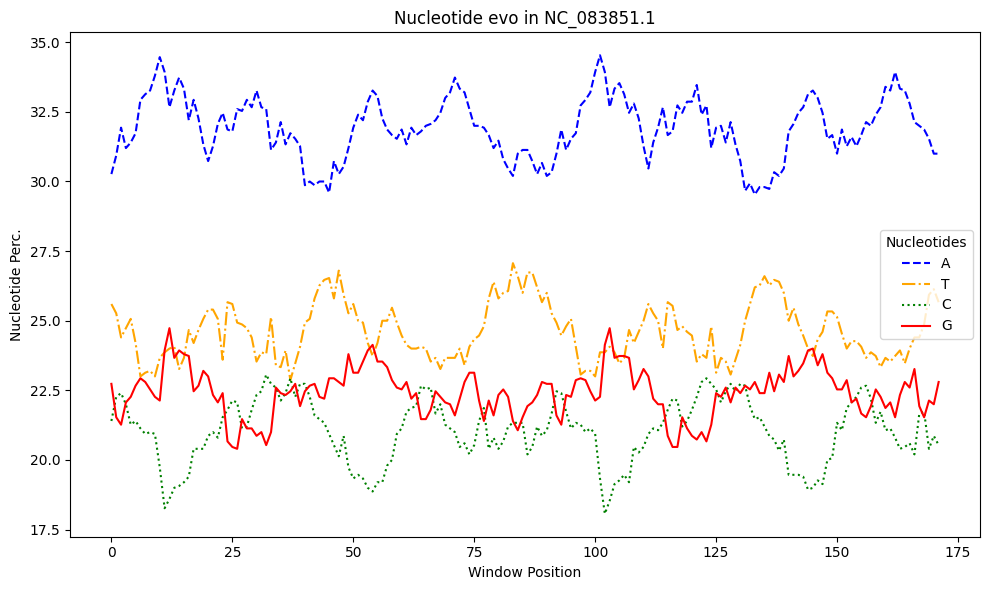

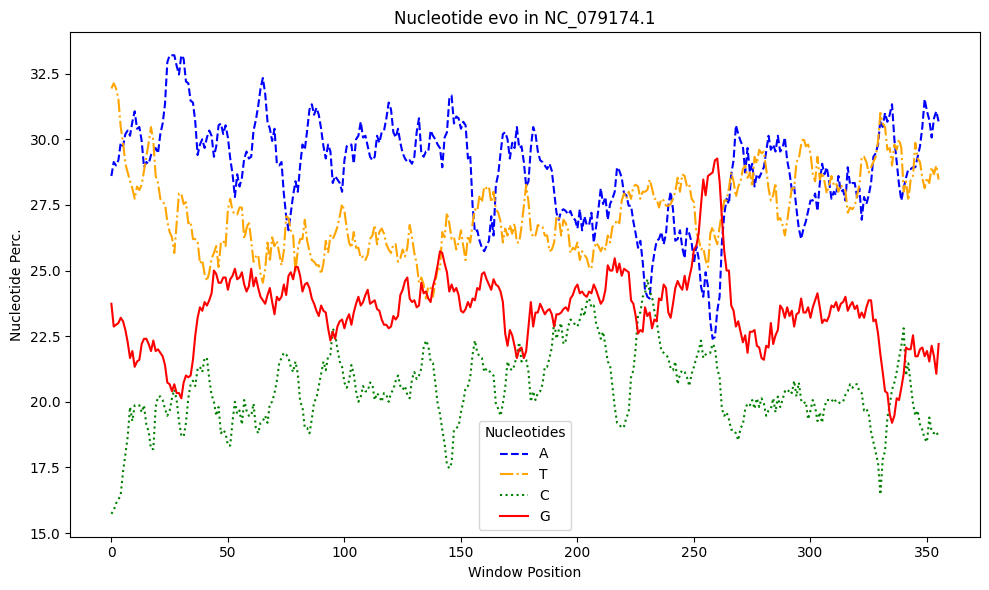

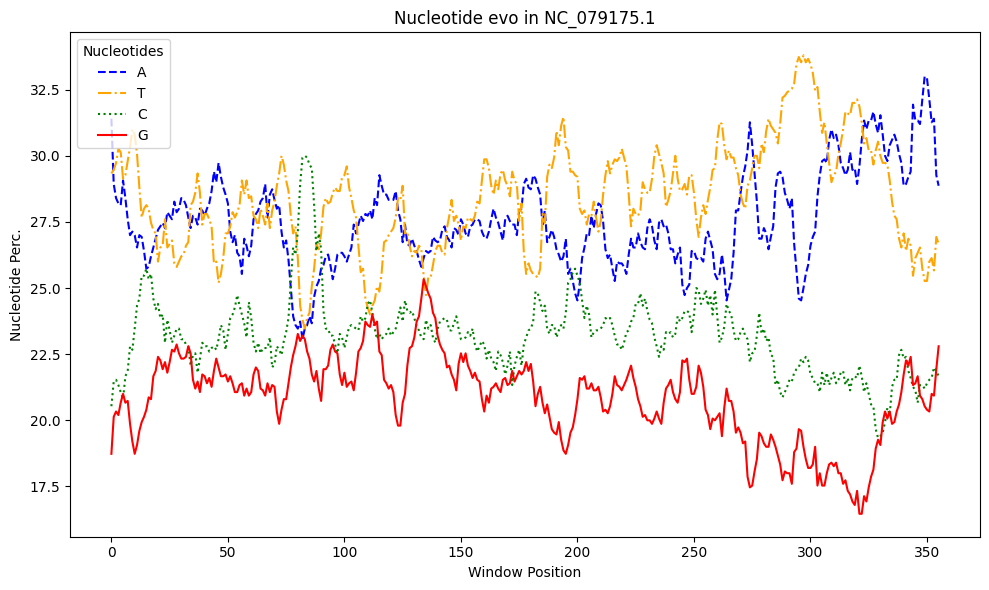

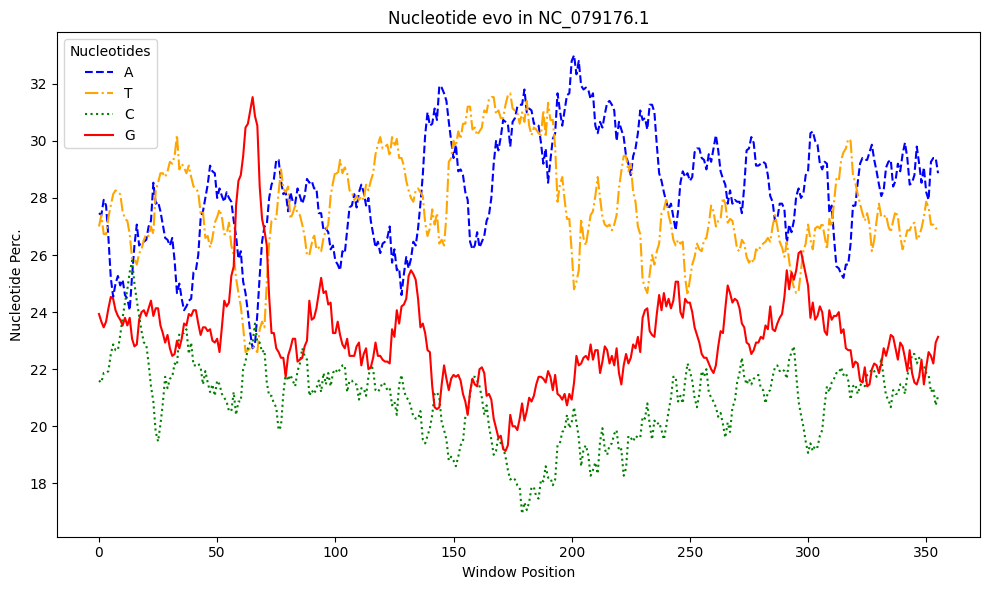

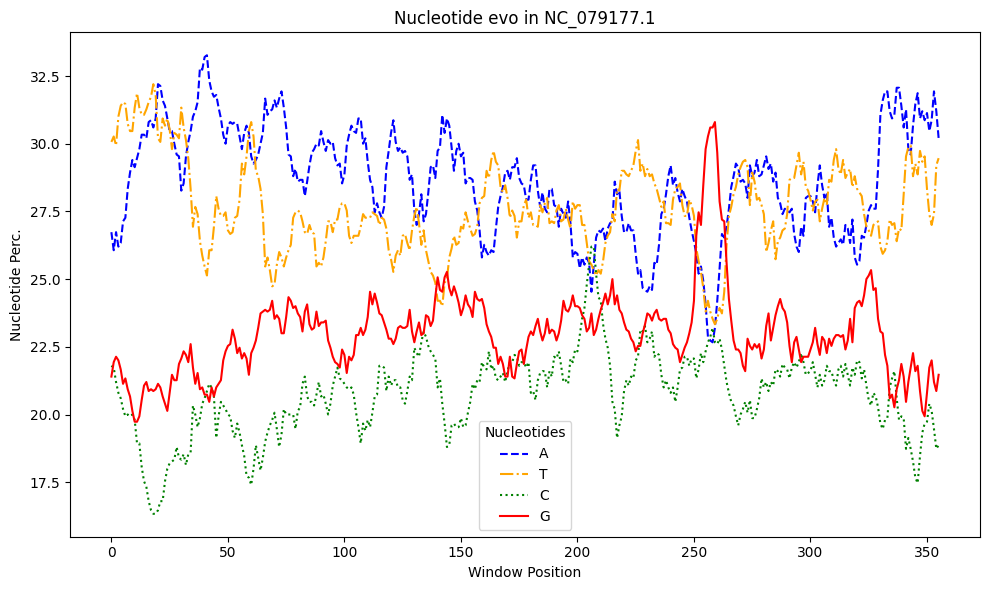

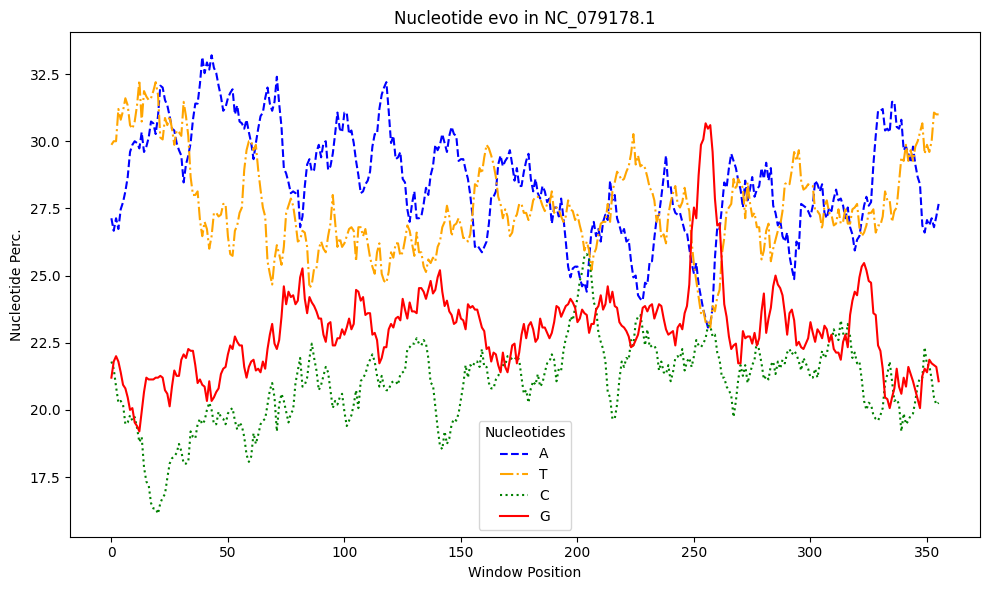

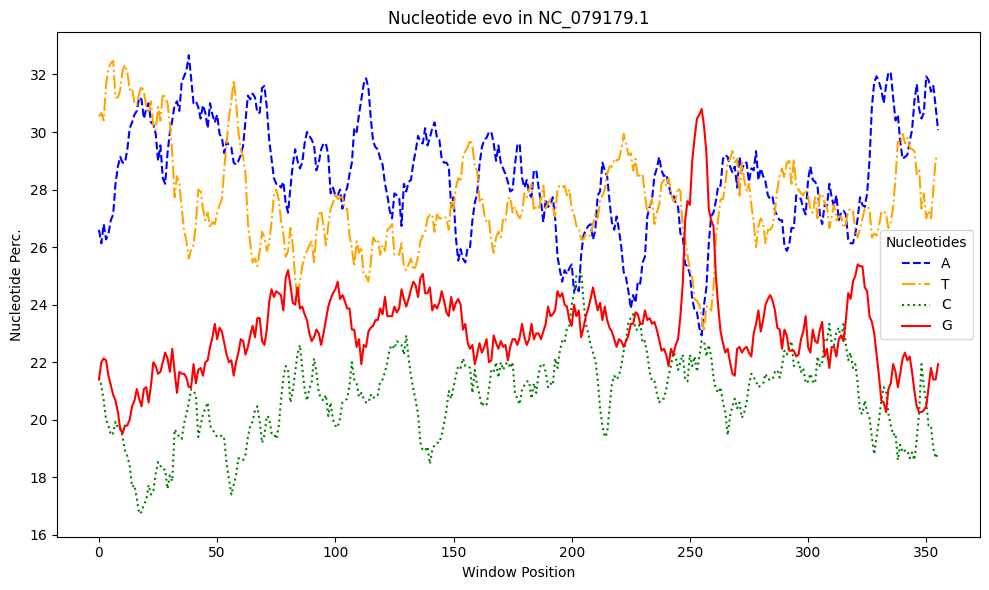

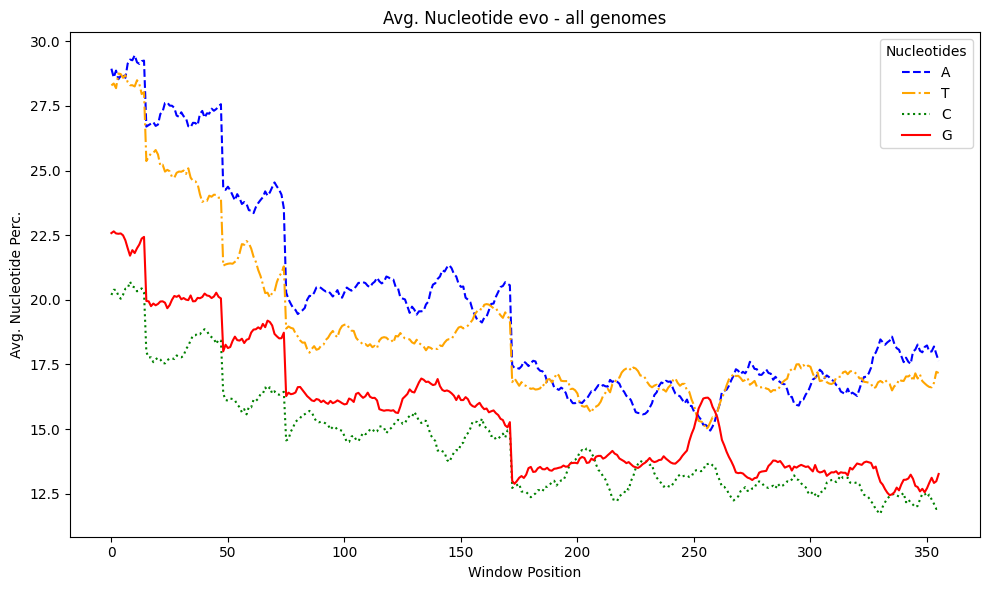

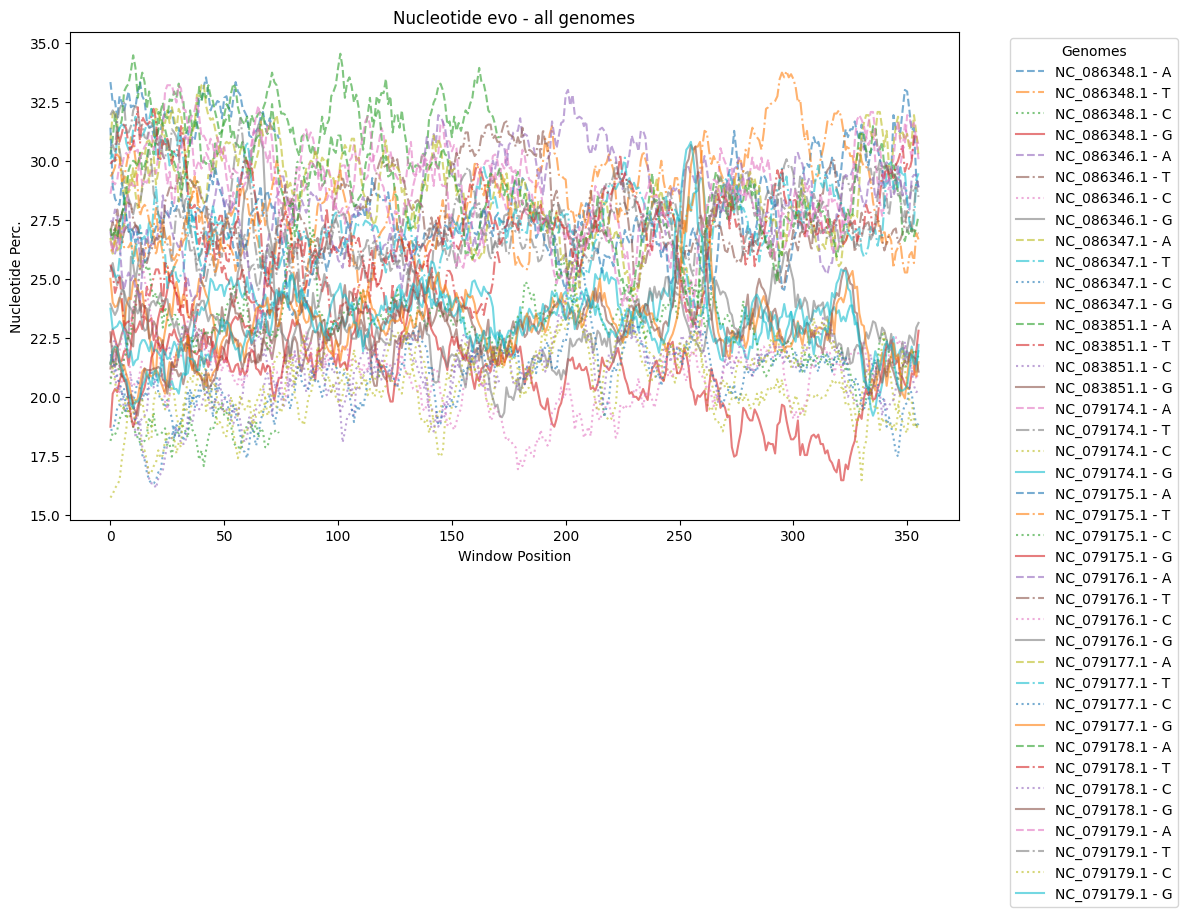

In [34]:
file_name = "tengenoms.fa"
window_size = 1500  
step_size = 150     

main(file_name, window_size, step_size)